<a href="https://colab.research.google.com/github/glopez21/Data-Analytics-Foundations/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Analysis

*We need to do some setting-up in order for some of the code to perform properly!*

*Once the set up is done, we can then adapt most of the code and the environment to our purpose!*

In [ ]:
#-----------------------
# most of the code set-up is done for now!
#-----------------------

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#------------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#------------------------

from keras.models import Sequential
from keras.layers import Dense

#------------------------
import warnings
warnings.filterwarnings('ignore')

#matplotlib.use("TkAgg")
np.random.seed(42)
sns.set()

In [ ]:
def preprocess(data):
    print('----------------------------------------------')
    print("Before preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in data.columns:
        missing_rows = data.loc[data[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # Replace 0 values with the mean of the existing values
    data['Glucose'] = data['Glucose'].replace(0, np.nan)
    data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)
    data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)
    data['Insulin'] = data['Insulin'].replace(0, np.nan)
    data['BMI'] = data['BMI'].replace(0, np.nan)
    data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
    data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
    data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].mean())
    data['Insulin'] = data['Insulin'].fillna(data['Insulin'].mean())
    data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

    print('----------------------------------------------')
    print("After preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in data.columns:
        missing_rows = data.loc[data[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # Standardization
    data_scaled = preprocessing.scale(data)
    data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
    data_scaled['Outcome'] = data['Outcome']
    data = data_scaled
    

    return data

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Diabetes Analysis/data/diabetes.csv') 

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### *in here we are going to Perform some preprocessing and feature engineering.*
#### Now, according some of the reading I have done; Feature engineering refers to the process of using domain knowledge of the data in order to create features which then make machine learning algorithms work more efficiently. If this process is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. Feature Engineering is an art.

## Preprocessing!

In [ ]:
data = preprocess(data)

----------------------------------------------
Before preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------
----------------------------------------------
After preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------


# Feature engineering

In [ ]:
# Split the data into a training and testing set
X = data.loc[:, data.columns != 'Outcome']
y = data.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Let's build neural networks using Keras

In [ ]:

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=False)


### Understanding the accuracy of the results

In [ ]:
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


Training Accuracy: 91.21%

Testing Accuracy: 68.83%



### Plotting the results with Confusion Matrix

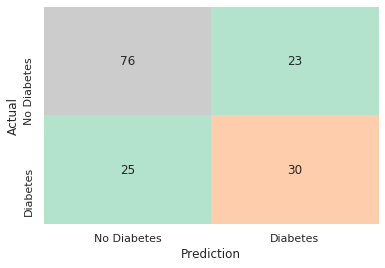

<Figure size 432x288 with 0 Axes>

In [ ]:
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], cbar=False, cmap='Pastel2')#YlOrRd
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

### Plotting the results using ROC Curve

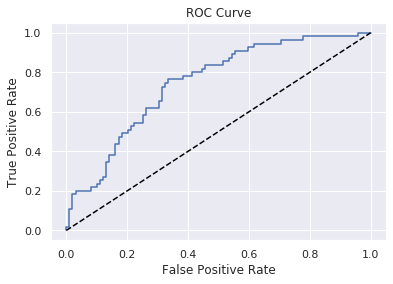

<Figure size 432x288 with 0 Axes>

In [ ]:
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

*More visualizations*

In [ ]:
# # show density plot
# # create a subplot of 3 x 3
#plt.subplots(data,figsize=(20,20))

# # show histogram
# data.hist()
# plt.tight_layout()
# plt.show()
#sns.distplot(data, kde=False, color="b", ax=axes[3, 3])
#sns.pairplot(data)#, #hue='insulin' 

In [ ]:
# sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# # Plot a kernel density estimate and rug plot
# sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# # Plot a filled kernel density estimate
# sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# # Plot a histogram and kernel density estimate
# sns.distplot(d, color="m", ax=axes[1, 1])

# plt.setp(axes, yticks=[])
# plt.tight_layout()

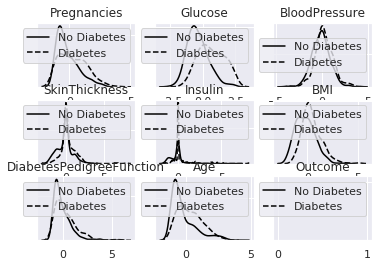

In [ ]:
# Plot a density plot for each variable

for idx, col in enumerate(data.columns):
    ax = plt.subplot(3,3,idx+1,)
    ax.yaxis.set_ticklabels([])
    sns.distplot(data.loc[data.Outcome == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    sns.distplot(data.loc[data.Outcome == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

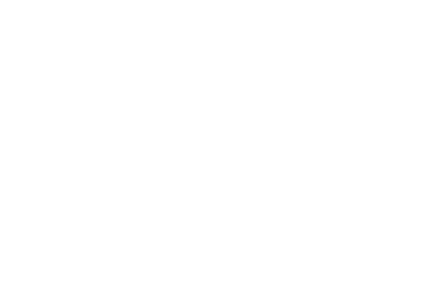

In [ ]:
# Hide the 9th subplot (bottom right) since there are only 8 plots
# plt.subplot(3,3,9).set_visible(False)
# plt.tight_layout()
# plt.show()
